In [1]:
#######################################################################
# Copyright (C)                                                       #
# 2016 Shangtong Zhang(zhangshangtong.cpp@gmail.com)                  #
# 2016 Kenta Shimada(hyperkentakun@gmail.com)                         #
# Permission given to modify the code as long as you keep this        #
# declaration at the top                                              #
#######################################################################
import numpy as np

In [2]:
WORLD_SIZE = 4
REWARD = -1.0
ACTION_PROB = 0.25

world = np.zeros((WORLD_SIZE, WORLD_SIZE))

# left, up, right, down
actions = ['L', 'U', 'R', 'D']

In [3]:
nextState = []
for i in range(0, WORLD_SIZE):
    nextState.append([])
    for j in range(0, WORLD_SIZE):
        next = dict()
        if i == 0:
            next['U'] = [i, j]
        else:
            next['U'] = [i - 1, j]

        if i == WORLD_SIZE - 1:
            next['D'] = [i, j]
        else:
            next['D'] = [i + 1, j]

        if j == 0:
            next['L'] = [i, j]
        else:
            next['L'] = [i, j - 1]

        if j == WORLD_SIZE - 1:
            next['R'] = [i, j]
        else:
            next['R'] = [i, j + 1]

        nextState[i].append(next)
nextState

[[{'D': [1, 0], 'L': [0, 0], 'R': [0, 1], 'U': [0, 0]},
  {'D': [1, 1], 'L': [0, 0], 'R': [0, 2], 'U': [0, 1]},
  {'D': [1, 2], 'L': [0, 1], 'R': [0, 3], 'U': [0, 2]},
  {'D': [1, 3], 'L': [0, 2], 'R': [0, 3], 'U': [0, 3]}],
 [{'D': [2, 0], 'L': [1, 0], 'R': [1, 1], 'U': [0, 0]},
  {'D': [2, 1], 'L': [1, 0], 'R': [1, 2], 'U': [0, 1]},
  {'D': [2, 2], 'L': [1, 1], 'R': [1, 3], 'U': [0, 2]},
  {'D': [2, 3], 'L': [1, 2], 'R': [1, 3], 'U': [0, 3]}],
 [{'D': [3, 0], 'L': [2, 0], 'R': [2, 1], 'U': [1, 0]},
  {'D': [3, 1], 'L': [2, 0], 'R': [2, 2], 'U': [1, 1]},
  {'D': [3, 2], 'L': [2, 1], 'R': [2, 3], 'U': [1, 2]},
  {'D': [3, 3], 'L': [2, 2], 'R': [2, 3], 'U': [1, 3]}],
 [{'D': [3, 0], 'L': [3, 0], 'R': [3, 1], 'U': [2, 0]},
  {'D': [3, 1], 'L': [3, 0], 'R': [3, 2], 'U': [2, 1]},
  {'D': [3, 2], 'L': [3, 1], 'R': [3, 3], 'U': [2, 2]},
  {'D': [3, 3], 'L': [3, 2], 'R': [3, 3], 'U': [2, 3]}]]

In [4]:
states = []
for i in range(0, WORLD_SIZE):
    for j in range(0, WORLD_SIZE):
        if (i == 0 and j == 0) or (i == WORLD_SIZE - 1 and j == WORLD_SIZE - 1):
            continue
        else:
            states.append([i, j])
states

[[0, 1],
 [0, 2],
 [0, 3],
 [1, 0],
 [1, 1],
 [1, 2],
 [1, 3],
 [2, 0],
 [2, 1],
 [2, 2],
 [2, 3],
 [3, 0],
 [3, 1],
 [3, 2]]

In [5]:
counter = 0 
while True:
    if counter <=3:
        print(world)
    # keep iteration until convergence
    newWorld = np.zeros((WORLD_SIZE, WORLD_SIZE))
    for i, j in states:
        for action in actions:
            newPosition = nextState[i][j][action]
            # bellman equation
            newWorld[i, j] += ACTION_PROB * (REWARD + world[newPosition[0], newPosition[1]])
    if np.sum(np.abs(world - newWorld)) < 1e-4:
        print('Random Policy')
        print(newWorld)
        break
    world = newWorld
    counter += 1

[[ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]
 [ 0.  0.  0.  0.]]
[[ 0. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1. -1.]
 [-1. -1. -1.  0.]]
[[ 0.   -1.75 -2.   -2.  ]
 [-1.75 -2.   -2.   -2.  ]
 [-2.   -2.   -2.   -1.75]
 [-2.   -2.   -1.75  0.  ]]
[[ 0.     -2.4375 -2.9375 -3.    ]
 [-2.4375 -2.875  -3.     -2.9375]
 [-2.9375 -3.     -2.875  -2.4375]
 [-3.     -2.9375 -2.4375  0.    ]]
Random Policy
[[  0.         -13.99990931 -19.99986561 -21.99984961]
 [-13.99990931 -17.99988161 -19.99986651 -19.99986561]
 [-19.99986561 -19.99986651 -17.99988161 -13.99990931]
 [-21.99984961 -19.99986561 -13.99990931   0.        ]]


In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from math import *

In [7]:
MAX_CARS = 20

# maximum # of cars to move during night
MAX_MOVE_OF_CARS = 5

# expectation for rental requests in first location
RENTAL_REQUEST_FIRST_LOC = 3

# expectation for rental requests in second location
RENTAL_REQUEST_SECOND_LOC = 4

# expectation for # of cars returned in first location
RETURNS_FIRST_LOC = 3

# expectation for # of cars returned in second location
RETURNS_SECOND_LOC = 2

DISCOUNT = 0.9

# credit earned by a car
RENTAL_CREDIT = 10

# cost of moving a car
MOVE_CAR_COST = 2

# current policy
policy = np.zeros((MAX_CARS + 1, MAX_CARS + 1))

# current state value
stateValue = np.zeros((MAX_CARS + 1, MAX_CARS + 1))

In [8]:
states = []

# all possible actions
actions = np.arange(-MAX_MOVE_OF_CARS, MAX_MOVE_OF_CARS + 1)

# axes for printing use
AxisXPrint = []
AxisYPrint = []
for i in range(0, MAX_CARS + 1):
    for j in range(0, MAX_CARS + 1):
        AxisXPrint.append(i)
        AxisYPrint.append(j)
        states.append([i, j])

In [9]:
def prettyPrint(data, labels):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    AxisZ = []
    for i, j in states:
        AxisZ.append(data[i, j])
    ax.scatter(AxisXPrint, AxisYPrint, AxisZ)
    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])
    ax.set_zlabel(labels[2])

In [10]:
# An up bound for poisson distribution
# If n is greater than this value, then the probability of getting n is truncated to 0
POISSON_UP_BOUND = 11

# Probability for poisson distribution
# @lam: lambda should be less than 10 for this function
poissonBackup = dict()
def poisson(n, lam):
    global poissonBackup
    key = n * 10 + lam
    if key not in poissonBackup.keys():
        poissonBackup[key] = exp(-lam) * pow(lam, n) / factorial(n)
    return poissonBackup[key]

In [11]:
# @state: [# of cars in first location, # of cars in second location]
# @action: positive if moving cars from first location to second location,
#          negative if moving cars from second location to first location
# @stateValue: state value matrix
def expectedReturn(state, action, stateValue):
    # initailize total return
    returns = 0.0

    # cost for moving cars
    returns -= MOVE_CAR_COST * abs(action)

    # go through all possible rental requests
    for rentalRequestFirstLoc in range(0, POISSON_UP_BOUND):
        for rentalRequestSecondLoc in range(0, POISSON_UP_BOUND):
            # moving cars
            numOfCarsFirstLoc = int(min(state[0] - action, MAX_CARS))
            numOfCarsSecondLoc = int(min(state[1] + action, MAX_CARS))

            # valid rental requests should be less than actual # of cars
            realRentalFirstLoc = min(numOfCarsFirstLoc, rentalRequestFirstLoc)
            realRentalSecondLoc = min(numOfCarsSecondLoc, rentalRequestSecondLoc)

            # get credits for renting
            reward = (realRentalFirstLoc + realRentalSecondLoc) * RENTAL_CREDIT
            numOfCarsFirstLoc -= realRentalFirstLoc
            numOfCarsSecondLoc -= realRentalSecondLoc

            # probability for current combination of rental requests
            prob = poisson(rentalRequestFirstLoc, RENTAL_REQUEST_FIRST_LOC) * \
                         poisson(rentalRequestSecondLoc, RENTAL_REQUEST_SECOND_LOC)

            # if set True, model is simplified such that the # of cars returned in daytime becomes constant
            # rather than a random value from poisson distribution, which will reduce calculation time
            # and leave the optimal policy/value state matrix almost the same
            constantReturnedCars = True
            if constantReturnedCars:
                # get returned cars, those cars can be used for renting tomorrow
                returnedCarsFirstLoc = RETURNS_FIRST_LOC
                returnedCarsSecondLoc = RETURNS_SECOND_LOC
                numOfCarsFirstLoc = min(numOfCarsFirstLoc + returnedCarsFirstLoc, MAX_CARS)
                numOfCarsSecondLoc = min(numOfCarsSecondLoc + returnedCarsSecondLoc, MAX_CARS)
                returns += prob * (reward + DISCOUNT * stateValue[numOfCarsFirstLoc, numOfCarsSecondLoc])
            else:
                numOfCarsFirstLoc_ = numOfCarsFirstLoc
                numOfCarsSecondLoc_ = numOfCarsSecondLoc
                prob_ = prob
                for returnedCarsFirstLoc in range(0, POISSON_UP_BOUND):
                    for returnedCarsSecondLoc in range(0, POISSON_UP_BOUND):
                        numOfCarsFirstLoc = numOfCarsFirstLoc_
                        numOfCarsSecondLoc = numOfCarsSecondLoc_
                        prob = prob_
                        numOfCarsFirstLoc = min(numOfCarsFirstLoc + returnedCarsFirstLoc, MAX_CARS)
                        numOfCarsSecondLoc = min(numOfCarsSecondLoc + returnedCarsSecondLoc, MAX_CARS)
                        prob = poisson(returnedCarsFirstLoc, RETURNS_FIRST_LOC) * \
                               poisson(returnedCarsSecondLoc, RETURNS_SECOND_LOC) * prob
                        returns += prob * (reward + DISCOUNT * stateValue[numOfCarsFirstLoc, numOfCarsSecondLoc])
    return returns

Policy: 


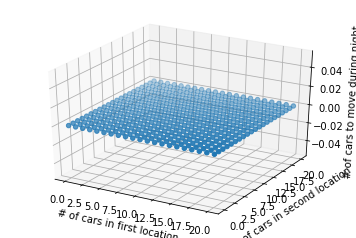

Expected return with current policy


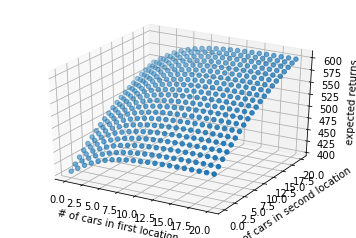

Policy improvement 0
Policy for 332 states changed
Policy: 


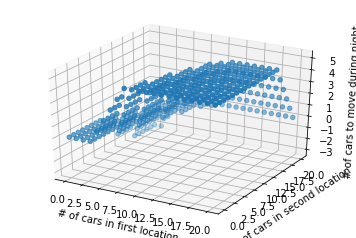

Expected return with current policy


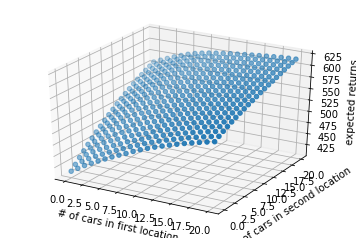

Policy improvement 1
Policy for 286 states changed
Policy: 


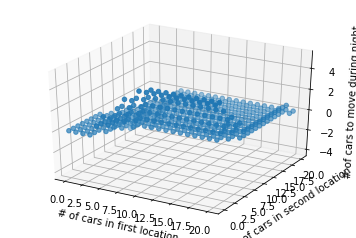

Expected return with current policy


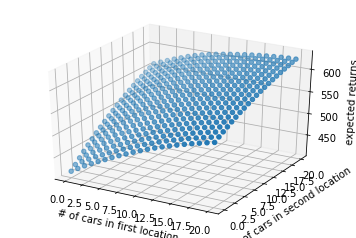

Policy improvement 2
Policy for 83 states changed
Policy: 


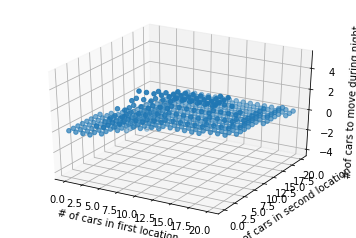

Expected return with current policy


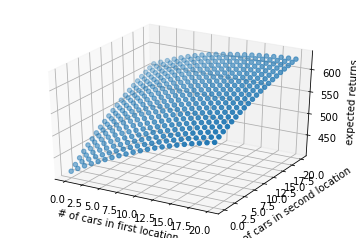

Policy improvement 3
Policy for 19 states changed
Policy: 


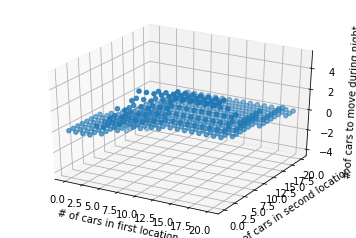

Expected return with current policy


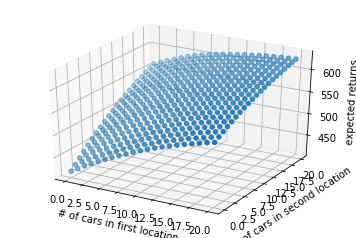

Policy improvement 4
Policy for 0 states changed
******** FINAL POLICY *********


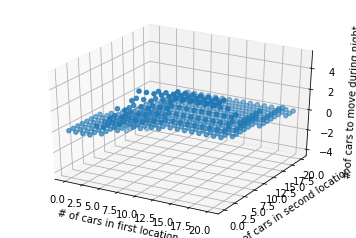

In [12]:
newStateValue = np.zeros((MAX_CARS + 1, MAX_CARS + 1))
improvePolicy = False
policyImprovementInd = 0
while True:
    if improvePolicy == True:
        # start policy improvement
        print("Policy: ")
        prettyPrint(policy, ['# of cars in first location', '# of cars in second location', '# of cars to move during night'])
        plt.show()
        print("Expected return with current policy")
        prettyPrint(stateValue, ['# of cars in first location', '# of cars in second location', 'expected returns'])
        plt.show()
        print('Policy improvement', policyImprovementInd)
        policyImprovementInd += 1
        newPolicy = np.zeros((MAX_CARS + 1, MAX_CARS + 1))
        for i, j in states:
            actionReturns = []
            # go through all actions and select the best one
            for action in actions:
                if (action >= 0 and i >= action) or (action < 0 and j >= abs(action)):
                    actionReturns.append(expectedReturn([i, j], action, stateValue))
                else:
                    actionReturns.append(-float('inf'))
            bestAction = np.argmax(actionReturns)
            newPolicy[i, j] = actions[bestAction]

        # if policy is stable
        policyChanges = np.sum(newPolicy != policy)
        print('Policy for', policyChanges, 'states changed')
        if policyChanges == 0:
            policy = newPolicy
            print("******** FINAL POLICY *********")
            prettyPrint(policy, ['# of cars in first location', '# of cars in second location', '# of cars to move during night'])
            plt.show()
            break
        policy = newPolicy
        improvePolicy = False

    # start policy evaluation
    for i, j in states:
        newStateValue[i, j] = expectedReturn([i, j], policy[i, j], stateValue)
    if np.sum(np.abs(newStateValue - stateValue)) < 1e-4:
        stateValue[:] = newStateValue
        improvePolicy = True
        continue
    stateValue[:] = newStateValue

In [13]:
parkingCost = 4
# @state: [# of cars in first location, # of cars in second location]
# @action: positive if moving cars from first location to second location,
#          negative if moving cars from second location to first location
# @stateValue: state value matrix
def expectedReturnExercise4_5(state, action, stateValue):
    # initailize total return
    returns = 0.0

    # cost for moving cars
    cost_action = action
    if (action > 0 ):
        cost_action = action - 1

    totalNumOfCarsFirstLoc = int(min(state[0] - action, MAX_CARS))
    totalNumOfCarsSecondLoc = int(min(state[1] + action, MAX_CARS))

    if totalNumOfCarsFirstLoc > 10:
        returns -= parkingCost
    
    if totalNumOfCarsSecondLoc > 10:
        returns -= parkingCost
    
    returns -= MOVE_CAR_COST * abs(cost_action)

    # go through all possible rental requests
    for rentalRequestFirstLoc in range(0, POISSON_UP_BOUND):
        for rentalRequestSecondLoc in range(0, POISSON_UP_BOUND):
            # moving cars
            numOfCarsFirstLoc = int(min(state[0] - action, MAX_CARS))
            numOfCarsSecondLoc = int(min(state[1] + action, MAX_CARS))

            # valid rental requests should be less than actual # of cars
            realRentalFirstLoc = min(numOfCarsFirstLoc, rentalRequestFirstLoc)
            realRentalSecondLoc = min(numOfCarsSecondLoc, rentalRequestSecondLoc)

            # get credits for renting
            reward = (realRentalFirstLoc + realRentalSecondLoc) * RENTAL_CREDIT
            numOfCarsFirstLoc -= realRentalFirstLoc
            numOfCarsSecondLoc -= realRentalSecondLoc

            # probability for current combination of rental requests
            prob = poisson(rentalRequestFirstLoc, RENTAL_REQUEST_FIRST_LOC) * \
                         poisson(rentalRequestSecondLoc, RENTAL_REQUEST_SECOND_LOC)

            # if set True, model is simplified such that the # of cars returned in daytime becomes constant
            # rather than a random value from poisson distribution, which will reduce calculation time
            # and leave the optimal policy/value state matrix almost the same
            constantReturnedCars = True
            if constantReturnedCars:
                # get returned cars, those cars can be used for renting tomorrow
                returnedCarsFirstLoc = RETURNS_FIRST_LOC
                returnedCarsSecondLoc = RETURNS_SECOND_LOC
                numOfCarsFirstLoc = min(numOfCarsFirstLoc + returnedCarsFirstLoc, MAX_CARS)
                numOfCarsSecondLoc = min(numOfCarsSecondLoc + returnedCarsSecondLoc, MAX_CARS)
                returns += prob * (reward + DISCOUNT * stateValue[numOfCarsFirstLoc, numOfCarsSecondLoc])
            else:
                numOfCarsFirstLoc_ = numOfCarsFirstLoc
                numOfCarsSecondLoc_ = numOfCarsSecondLoc
                prob_ = prob
                for returnedCarsFirstLoc in range(0, POISSON_UP_BOUND):
                    for returnedCarsSecondLoc in range(0, POISSON_UP_BOUND):
                        numOfCarsFirstLoc = numOfCarsFirstLoc_
                        numOfCarsSecondLoc = numOfCarsSecondLoc_
                        prob = prob_
                        numOfCarsFirstLoc = min(numOfCarsFirstLoc + returnedCarsFirstLoc, MAX_CARS)
                        numOfCarsSecondLoc = min(numOfCarsSecondLoc + returnedCarsSecondLoc, MAX_CARS)
                        prob = poisson(returnedCarsFirstLoc, RETURNS_FIRST_LOC) * \
                               poisson(returnedCarsSecondLoc, RETURNS_SECOND_LOC) * prob
                        returns += prob * (reward + DISCOUNT * stateValue[numOfCarsFirstLoc, numOfCarsSecondLoc])
    return returns

Policy: 


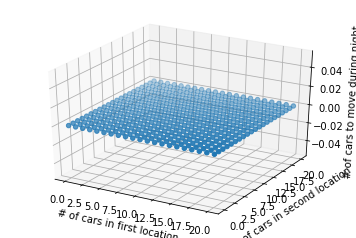

Expected return with current policy


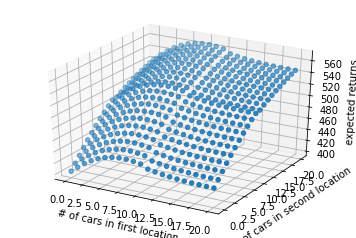

Policy improvement 0
Policy for 388 states changed
Policy: 


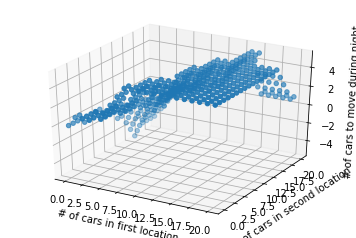

Expected return with current policy


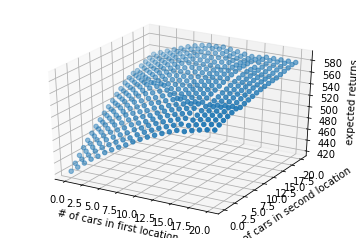

Policy improvement 1
Policy for 300 states changed
Policy: 


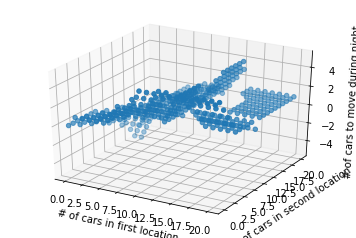

Expected return with current policy


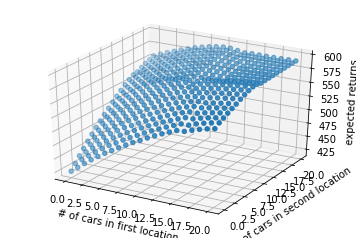

Policy improvement 2
Policy for 144 states changed
Policy: 


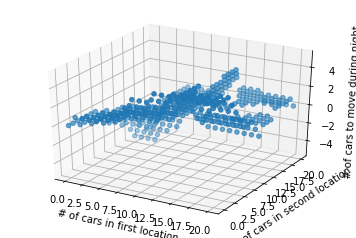

Expected return with current policy


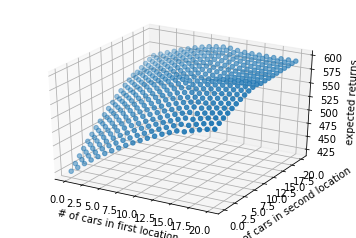

Policy improvement 3
Policy for 20 states changed
Policy: 


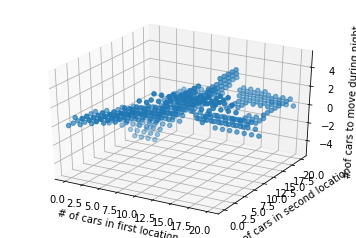

Expected return with current policy


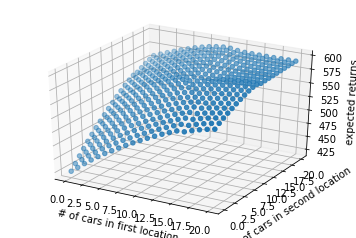

Policy improvement 4
Policy for 0 states changed
******** FINAL POLICY *********


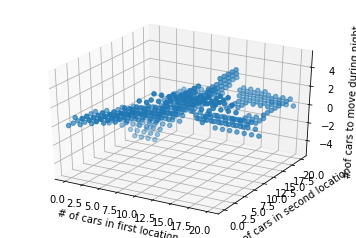

In [14]:
# current policy
policy = np.zeros((MAX_CARS + 1, MAX_CARS + 1))

# current state value
stateValue = np.zeros((MAX_CARS + 1, MAX_CARS + 1))

newStateValue = np.zeros((MAX_CARS + 1, MAX_CARS + 1))
improvePolicy = False
policyImprovementInd = 0
while True:
    if improvePolicy == True:
        # start policy improvement
        print("Policy: ")
        prettyPrint(policy, ['# of cars in first location', '# of cars in second location', '# of cars to move during night'])
        plt.show()
        print("Expected return with current policy")
        prettyPrint(stateValue, ['# of cars in first location', '# of cars in second location', 'expected returns'])
        plt.show()
        print('Policy improvement', policyImprovementInd)
        policyImprovementInd += 1
        newPolicy = np.zeros((MAX_CARS + 1, MAX_CARS + 1))
        for i, j in states:
            actionReturns = []
            # go through all actions and select the best one
            for action in actions:
                if (action >= 0 and i >= action) or (action < 0 and j >= abs(action)):
                    actionReturns.append(expectedReturnExercise4_5([i, j], action, stateValue))
                else:
                    actionReturns.append(-float('inf'))
            bestAction = np.argmax(actionReturns)
            newPolicy[i, j] = actions[bestAction]

        # if policy is stable
        policyChanges = np.sum(newPolicy != policy)
        print('Policy for', policyChanges, 'states changed')
        if policyChanges == 0:
            policy = newPolicy
            print("******** FINAL POLICY *********")
            prettyPrint(policy, ['# of cars in first location', '# of cars in second location', '# of cars to move during night'])
            plt.show()
            break
        policy = newPolicy
        improvePolicy = False

    # start policy evaluationexpectedReturn
    for i, j in states:
        newStateValue[i, j] = expectedReturnExercise4_5([i, j], policy[i, j], stateValue)
    if np.sum(np.abs(newStateValue - stateValue)) < 1e-4:
        stateValue[:] = newStateValue
        improvePolicy = True
        continue
    stateValue[:] = newStateValue

In [15]:
GOAL = 100

# all states, including state 0 and state 100
states = np.arange(GOAL + 1)

# probability of head
headProb = 0.4

# optimal policy
policy = np.zeros(GOAL + 1)

# state value
stateValue = np.zeros(GOAL + 1)
stateValue[GOAL] = 1.0

In [16]:
while True:
    delta = 0.0
    for state in states[1:GOAL]:
        # get possilbe actions for current state
        actions = np.arange(min(state, GOAL - state) + 1)
        actionReturns = []
        for action in actions:
            actionReturns.append(headProb * stateValue[state + action] + (1 - headProb) * stateValue[state - action])
        newValue = np.max(actionReturns)
        delta += np.abs(stateValue[state] - newValue)
        # update state value
        stateValue[state] = newValue
    if delta < 1e-9:
        break

In [17]:
for state in states[1:GOAL]:
    actions = np.arange(min(state, GOAL - state) + 1)
    actionReturns = []
    for action in actions:
        actionReturns.append(headProb * stateValue[state + action] + (1 - headProb) * stateValue[state - action])
    # due to tie, can't reproduce the optimal policy in book
    policy[state] = actions[np.argmax(actionReturns)]


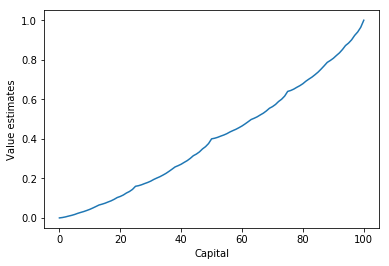

In [18]:
plt.xlabel('Capital')
plt.ylabel('Value estimates')
plt.plot(stateValue)
plt.show()

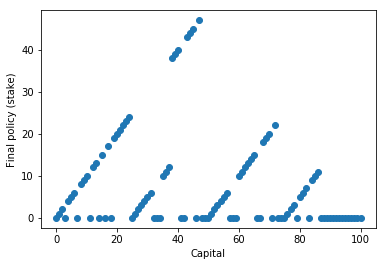

In [19]:
plt.scatter(states, policy)
plt.xlabel('Capital')
plt.ylabel('Final policy (stake)')
plt.show()

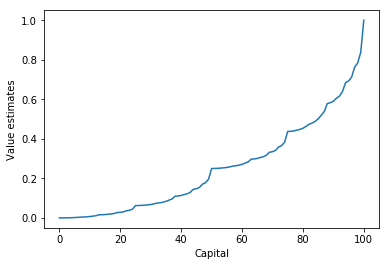

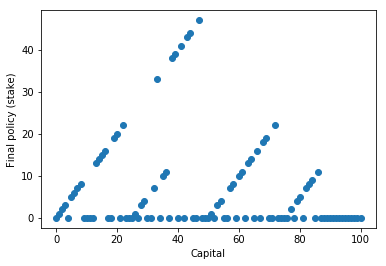

In [20]:
GOAL = 100

# all states, including state 0 and state 100
states = np.arange(GOAL + 1)

# probability of head
headProb = 0.25

# optimal policy
policy = np.zeros(GOAL + 1)

# state value
stateValue = np.zeros(GOAL + 1)
stateValue[GOAL] = 1.0

while True:
    delta = 0.0
    for state in states[1:GOAL]:
        # get possilbe actions for current state
        actions = np.arange(min(state, GOAL - state) + 1)
        actionReturns = []
        for action in actions:
            actionReturns.append(headProb * stateValue[state + action] + (1 - headProb) * stateValue[state - action])
        newValue = np.max(actionReturns)
        delta += np.abs(stateValue[state] - newValue)
        # update state value
        stateValue[state] = newValue
    if delta < 1e-9:
        break
        
for state in states[1:GOAL]:
    actions = np.arange(min(state, GOAL - state) + 1)
    actionReturns = []
    for action in actions:
        actionReturns.append(headProb * stateValue[state + action] + (1 - headProb) * stateValue[state - action])
    # due to tie, can't reproduce the optimal policy in book
    policy[state] = actions[np.argmax(actionReturns)]

plt.xlabel('Capital')
plt.ylabel('Value estimates')
plt.plot(stateValue)
plt.show()

plt.scatter(states, policy)
plt.xlabel('Capital')
plt.ylabel('Final policy (stake)')
plt.show()

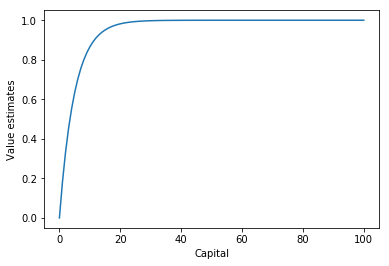

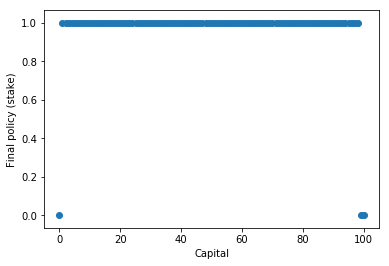

In [21]:
GOAL = 100

# all states, including state 0 and state 100
states = np.arange(GOAL + 1)

# probability of head
headProb = 0.55

# optimal policy
policy = np.zeros(GOAL + 1)

# state value
stateValue = np.zeros(GOAL + 1)
stateValue[GOAL] = 1.0

while True:
    delta = 0.0
    for state in states[1:GOAL]:
        # get possilbe actions for current state
        actions = np.arange(min(state, GOAL - state) + 1)
        actionReturns = []
        for action in actions:
            actionReturns.append(headProb * stateValue[state + action] + (1 - headProb) * stateValue[state - action])
        newValue = np.max(actionReturns)
        delta += np.abs(stateValue[state] - newValue)
        # update state value
        stateValue[state] = newValue
    if delta < 1e-9:
        break
        
for state in states[1:GOAL]:
    actions = np.arange(min(state, GOAL - state) + 1)
    actionReturns = []
    for action in actions:
        actionReturns.append(headProb * stateValue[state + action] + (1 - headProb) * stateValue[state - action])
    # due to tie, can't reproduce the optimal policy in book
    policy[state] = actions[np.argmax(actionReturns)]

plt.xlabel('Capital')
plt.ylabel('Value estimates')
plt.plot(stateValue)
plt.show()

plt.scatter(states, policy)
plt.xlabel('Capital')
plt.ylabel('Final policy (stake)')
plt.show()